# Context

In this notebook we will do some exploratory data analysis using bivariate and multivariate analysis

# Load packages

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load data

In [37]:
df = pd.read_excel(r'C:\Users\Usuario\OneDrive - Centro Cultural Colombo Americano\Documentos\ICESI\ANALISIS DE DATOS 1\Proyecto\Analitica_1\Data\output_data\hallazgos_clean.xlsx')

# Variable selected

In [38]:
var1 = 'oficina'
var2 = 'riesgo'

# Type of data

In [39]:
print(df[[var1, var2]].dtypes)

oficina    object
riesgo     object
dtype: object


# Contingency table

In [40]:
contingency_table = pd.crosstab(df[var1], df[var2])
print(f'Contingency Table:\n{contingency_table}')

Contingency Table:
riesgo           1 - Alto  2 - Medio  3 - Bajo  4 - Otro
oficina                                                 
alfonso lópez           6         15         1        12
apartado                2          6         0         6
armenia sur             1         15         1        28
autopista norte         3         27         0         4
barranquilla            3         27         4         4
...                   ...        ...       ...       ...
sur                     6         33         4         6
tulua                   9         32        28        22
tulua calle 25          3         43         7         1
villeta                 5         19         6         9
zipaquira               1         15        11         3

[61 rows x 4 columns]


# Stacked bar chart

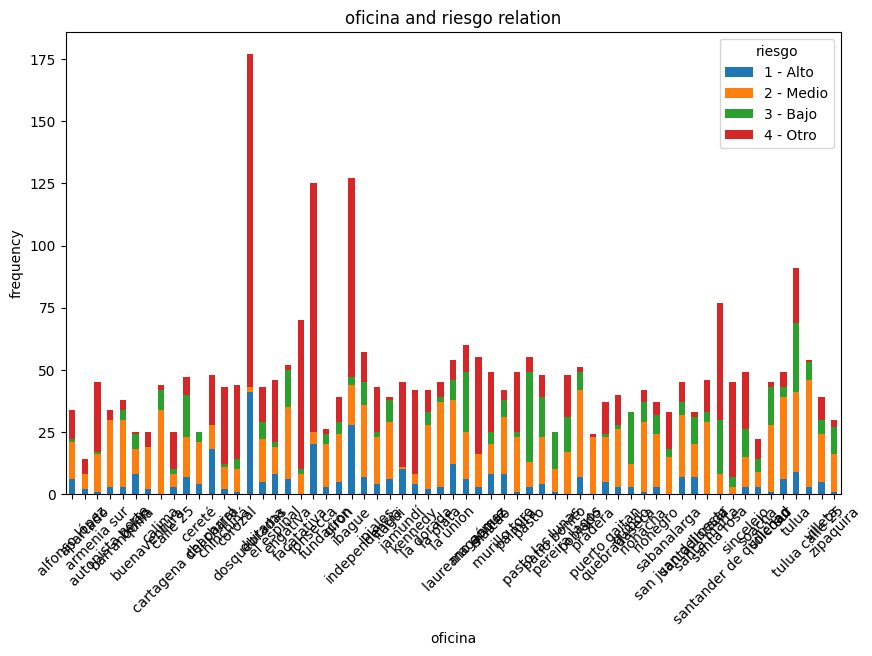

In [41]:
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(f'{var1} and {var2} relation')
plt.xticks(rotation=45)
plt.ylabel('frequency')
plt.show()

# Normalized bar chart

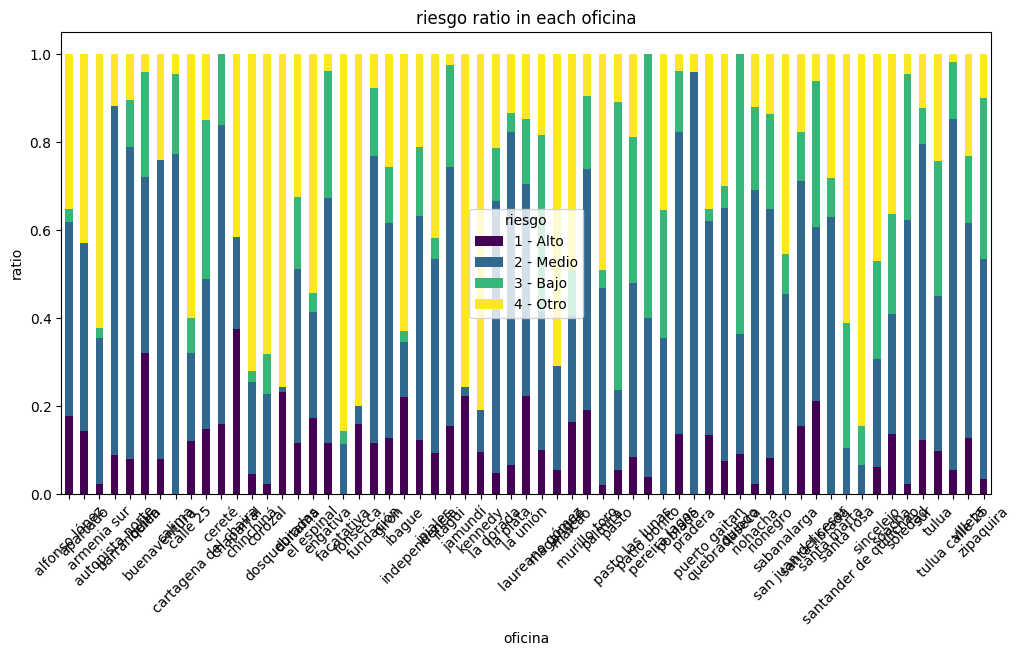

In [42]:
table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)
table_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title(f'{var2} ratio in each {var1}')
plt.xticks(rotation=45)
plt.ylabel('ratio')
plt.legend(title=var2)
plt.show()

# Chi-square test

In [46]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square: {chi2}, p-value: {p}')
if p < 0.05:
    print('There is a significant association between the variables.')
else:
    print('No significant association was found between the variables.')

Chi-square: 1680.2623061964741, p-value: 1.71173608350837e-241
There is a significant association between the variables.


# Further Analysis

In [44]:
print("\nAdditional Analysis:")
print("- This shows which branches have a higher proportion of each risk level.")
print("- If a branch has a high percentage in a single risk level, it could indicate a tendency to classify clients in a certain way.")
print("- This could be influenced by internal factors (credit policies) or external factors (regional economic conditions).")


Additional Analysis:
- This shows which branches have a higher proportion of each risk level.
- If a branch has a high percentage in a single risk level, it could indicate a tendency to classify clients in a certain way.
- This could be influenced by internal factors (credit policies) or external factors (regional economic conditions).
